# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

*Install dependencies and do necessary imports.*

In [1]:
! pip install scikit-plot

In [0]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import (
  BaggingClassifier,
  RandomForestClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  accuracy_score,
  classification_report,
  f1_score
)
from sklearn.model_selection import (
  train_test_split,
  GridSearchCV,
  KFold
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
  LabelEncoder,
  StandardScaler
)
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scikitplot as skplt

from plotly.subplots import make_subplots

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
# If on colab, uncomment the following lines
! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2020-03-29 20:04:39--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.15’

car_data.csv.15     100%[===================>]  57.01K  --.-KB/s    in 0.05s   

2020-03-29 20:04:40 (1.05 MB/s) - ‘car_data.csv.15’ saved [58374/58374]



In [4]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   ...   11   12   13  14  15  16   17   18
0   713  107  53  108  211  63  11  219  ...  228  704  198  69  10  21  190  203
1   220   99  55  101  206  62  13  222  ...  225  722  213  71   2   3  186  196
2   421   98  48  101  195  61  11  207  ...  227  650  193  71   5   7  189  196
3   369   89  47   81  156  57   8  161  ...  187  388  197  72   9  15  187  193
4   707   92  35   58  136  58   6  122  ...  142  222  116  64   6  17  197  203
5   778  111  50  103  199  60  11  211  ...  223  663  188  68   9   9  190  200
6   376  104  51  108  193  59  11  217  ...  232  694  203  72  15  22  190  201
7   590   84  44   65  128  55   8  150  ...  169  325  176  82   1  11  179  183
8    27  107  54   98  203  65  11  218  ...  229  696  216  72   1  28  187  199
9   532  104  49  105  209  61  11  207  ...  217  637  168  64   0  19  193  207
10  842   89  46   84  163  66  11  159  ...  173  368  176  72   1  20  186  197
11  242   85  42   59  132  58   7  149  ...  166  320  172  83   8   4  179  182
12   30   89  43   85  160  64  11  155  ...  173  356  174  72   5   9  185  196
13   11   90  34   66  136  55   6  123  ...  148  224  118  65   5  26  196  202
14  359  100  49   96  206  63   9  186  ...  202  519  176  62   3   5  197  205

[15 rows x 19 columns]

Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

0           1           2   ...          16          17          18
count  549.000000  549.000000  549.000000  ...  549.000000  549.000000  549.000000
mean   425.355191   93.635701   44.632058  ...   12.418944  188.897996  195.477231
std    248.393347    8.171200    6.073707  ...    8.875214    6.173626    7.483432
min      2.000000   77.000000   33.000000  ...    0.000000  176.000000  182.000000
25%    210.000000   87.000000   40.000000  ...    5.000000  185.000000  190.000000
50%    420.000000   93.000000   44.000000  ...   11.000000  188.000000  196.000000
75%    642.000000   99.000000   49.000000  ...   18.000000  193.000000  201.000000
max    845.000000  119.000000   58.000000  ...   41.000000  204.000000  211.000000

[8 rows x 19 columns]

In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Let's revise the *std* of train data and compare it with it normalized. 

In [8]:
stdsc = StandardScaler()
X_train_transformed = stdsc.fit_transform(X_train)

fig = go.Figure(
  data=[
    go.Scatter(
      x=np.arange(X_train.shape[0]),
      y=X_train.std(axis=0),
      name="as-is",
    ),
    go.Scatter(
      x=np.arange(X_train_transformed.shape[0]),
      y=X_train_transformed.std(axis=0),
      name="scaled",
    )
  ],
)
fig.update_layout(
  title="The std of train data",
  showlegend=True,
  yaxis_type="log",
  height=900,
  width=900
)
fig.show()

Okey, we shouldn't reinvent the wheel and use standart pipeline from sklearn. Usage of scaled data is necessary, because regularization is used in logistic regression, all the features are equal priori, so we need the same scale. It will also be useful for the **SAGA** solver.
Before we go next, transform target label into number.

In [9]:
label_encoder = LabelEncoder()
unique_labels = np.unique(np.concatenate((y_train, y_test)))
label_encoder.fit(unique_labels)
print(f"Unique labels: {np.unique(y_train)}")
y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

Unique labels: ['bus' 'opel' 'saab' 'van']


In [10]:
import seaborn as sns

pd.DataFrame(data) \
  .corr() \
  .style \
  .background_gradient(
    cmap=sns.light_palette(
      "blue", 
      as_cmap=True
    )
  )

The first column is strongly correlated. Actually, it's the number of the record in the table, so this feature is useless. Let's remove this column.

In [0]:
data = data[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

In [0]:
features_num = X_train.shape[1]

features_buttons = []
fig = make_subplots(
  rows=1,
  cols=1
)

In [0]:
for feature_idx in range(0, features_num):
  fig.add_trace(
    go.Scatter(
      x=X_train[:, feature_idx],
      y=y_train,
      visible=feature_idx==0,
      mode='markers',
      marker=dict(
        size=8,
        line=dict(
          width=1,
        ),
        symbol=201
      )
    )
  )
  features_buttons.append({
    "label": f"Feature #{feature_idx}",
    "method": "update",
    "args": [dict(visible=[
      other_feature==feature_idx 
      for other_feature in range(0, features_num)
    ])],
  })

In [14]:
fig.update_layout(
  showlegend=False,
  width=1200, 
  height=400,
  updatemenus=[
    go.layout.Updatemenu(
      active=0,
      buttons=features_buttons,
      direction='down',
      pad={"r": 10, "t": 10},
      showactive=True,
      x=0.05,
      xanchor='left',
      y=1.3,
      yanchor='top',
    )
  ]
)

fig.show()

It is impossible to determine visually that some feature is not needed, or vice versa - someone is not significant enough for classification. 

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [0]:
logregression = LogisticRegression(
  multi_class='multinomial',
  solver='saga',
  tol=1e-3,
  max_iter=500
)

pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('log_reg', logregression),
])

search = GridSearchCV(
  estimator=pipeline,
  param_grid={
    'log_reg__C': np.linspace(0.01, 10, 100)
  },
  n_jobs=-2
)

In [0]:
model = search.fit(X_train, y_train)

estimator = model.best_estimator_
params = search.best_params_

In [0]:
y_pred = estimator.predict(X_test)
y_probas = estimator.predict_proba(X_test)

In [18]:
print(params)

{'log_reg__C': 4.651818181818181}


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.92      0.95      0.93        73
        opel       0.59      0.57      0.58        77
        saab       0.59      0.57      0.58        77
         van       0.96      0.99      0.97        70

    accuracy                           0.76       297
   macro avg       0.76      0.77      0.77       297
weighted avg       0.76      0.76      0.76       297



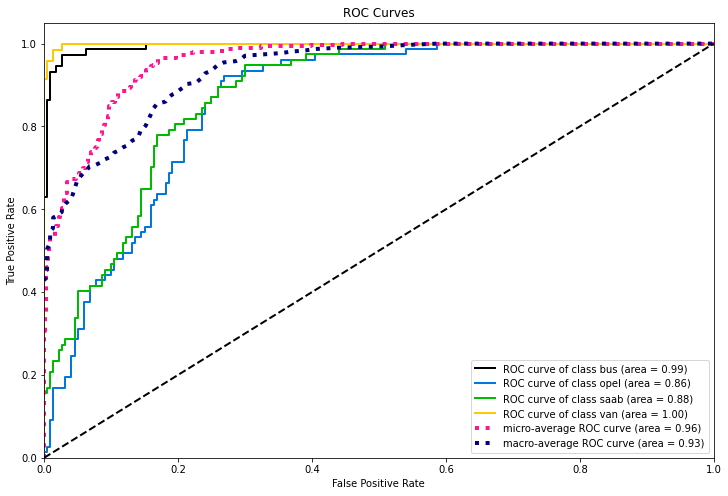

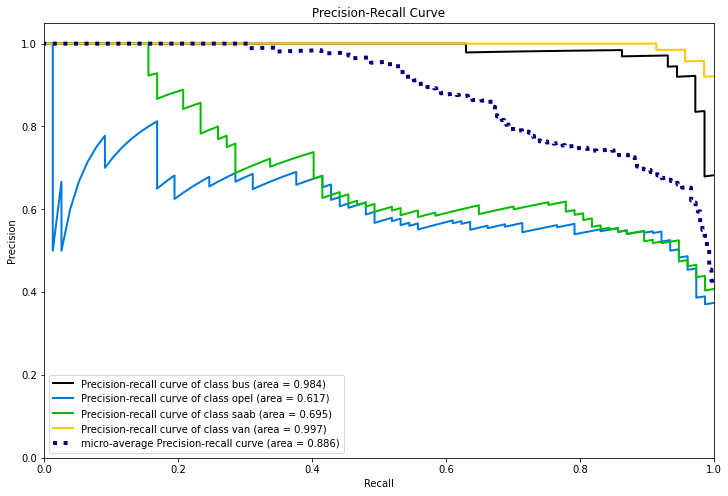

In [20]:
skplt.metrics.plot_roc(
  y_test,
  y_probas,
  figsize=(12, 8)
)
skplt.metrics.plot_precision_recall(
  y_test, 
  y_probas,
  figsize=(12, 8)
)
plt.show()

Areas under all ROC curves are close to or bigger than 0.9, so it means that logistic regression is suitable for our dataset.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [0]:
pca = PCA(n_components=features_num)
pca.fit(X_train_transformed)

explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()

In [22]:
go.Figure(
  layout=dict(
    xaxis=dict(
      title="number of components",
    ),
    yaxis=dict(
      title="explained variance",
    ),
    title=dict(
      text="Relation between explaided variance and number of components",
    ),
    height=450, 
    width=900,
    showlegend=False
  ),
  data=[
    go.Scatter(
      x=np.arange(1, features_num+1), 
      y=explained_variance_ratio_cumsum,
      mode='lines+markers'
    )
  ]
).show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Accoding to the explaided variance plot above, it's enough to get **n_components=11**, because **explaided_variance** is almost equal to **0.99**. Moreover, we get the benefit in execution time, of course. 

In [0]:
 n_components = 11

See transformations below. 
We made the transition to a new coordinate system, so don't forget to get additional scaling step after using PCA.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [0]:
pipeline = Pipeline([
  ('scaler_before', StandardScaler()),
  ('pca', PCA(n_components=n_components)),
  ('scaler_after', StandardScaler()),
  ('log_reg', LogisticRegression(
                multi_class='multinomial',
                solver='saga',
                tol=1e-3,
                max_iter=500,)),
])

search = GridSearchCV(
  estimator=pipeline,
  param_grid={
    'log_reg__C': np.linspace(0.01, 10, 100)
  },
  n_jobs=-2
)

In [0]:
model = search.fit(X_train, y_train)

estimator = model.best_estimator_
log_reg_params = model.best_params_

y_pred = estimator.predict(X_test)
y_probas = estimator.predict_proba(X_test)

In [26]:
print(log_reg_params)

{'log_reg__C': 1.1199999999999999}


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.89      0.92      0.91        73
        opel       0.54      0.53      0.54        77
        saab       0.53      0.52      0.53        77
         van       0.96      0.97      0.96        70

    accuracy                           0.73       297
   macro avg       0.73      0.74      0.73       297
weighted avg       0.72      0.73      0.73       297



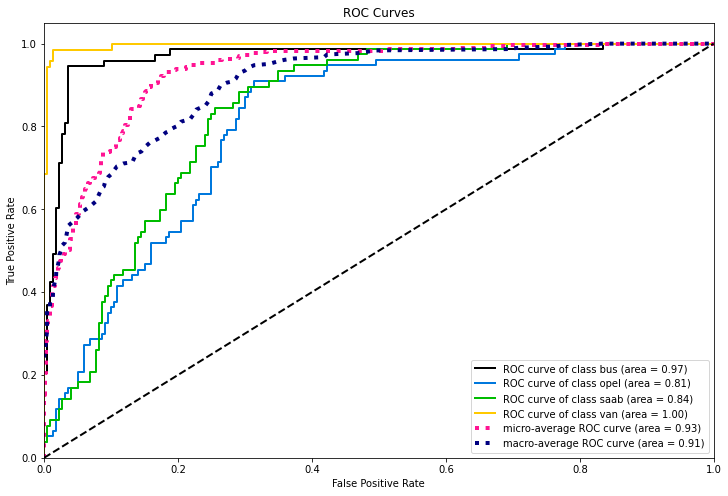

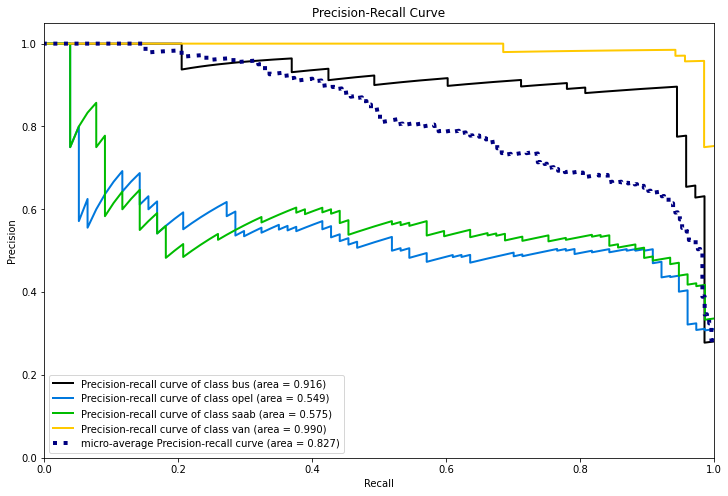

In [28]:
skplt.metrics.plot_roc(
  y_test,
  y_probas,
  figsize=(12, 8)
)
skplt.metrics.plot_precision_recall(
  y_test, 
  y_probas,
  figsize=(12, 8)
)
plt.show()

As you can see, the area under the ROC curve is less comparing with the pipeline without PCA. It's obvious, because log-reg model is able to determine more significant features.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [0]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(n_components=n_components)),
  ('scaler_after', StandardScaler()),
  ('dtc', DecisionTreeClassifier())
])

search = GridSearchCV(
  estimator=pipeline,
  param_grid={
    'dtc__max_depth': np.arange(1, 100)
  },
  n_jobs=-2
)

In [0]:
model = search.fit(X_train, y_train)

estimator = model.best_estimator_
tree_params = model.best_params_

y_pred = estimator.predict(X_test)
y_probas = estimator.predict_proba(X_test)

In [31]:
print(tree_params)

{'dtc__max_depth': 7}


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.88      0.81      0.84        73
        opel       0.46      0.47      0.46        77
        saab       0.40      0.42      0.41        77
         van       0.77      0.79      0.78        70

    accuracy                           0.61       297
   macro avg       0.63      0.62      0.62       297
weighted avg       0.62      0.61      0.62       297



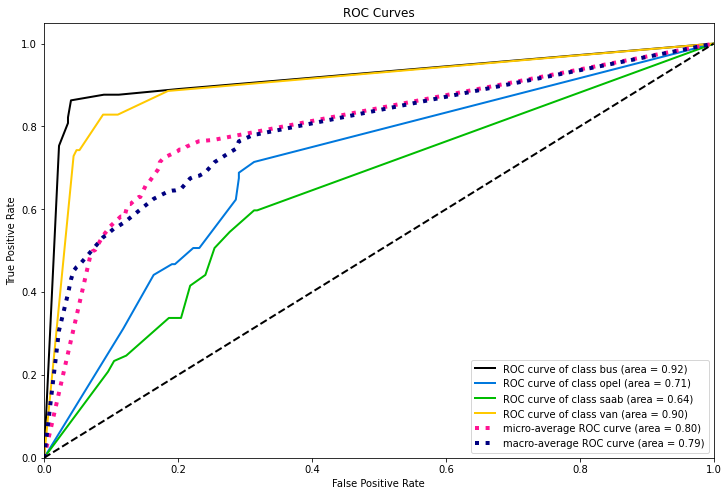

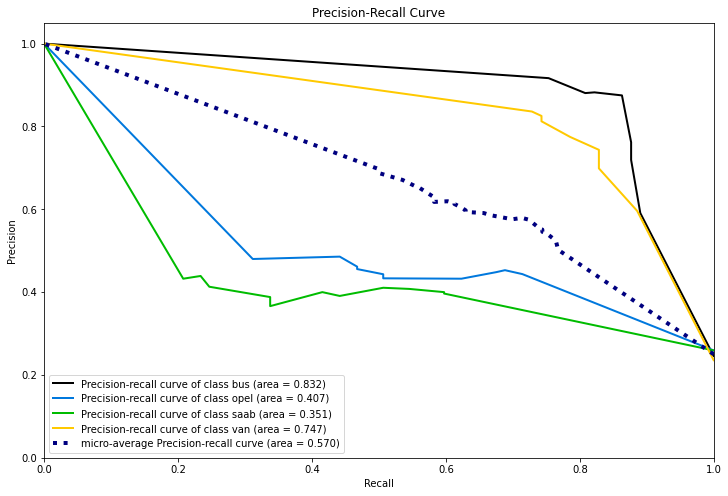

In [33]:
skplt.metrics.plot_roc(
  y_test,
  y_probas,
  figsize=(12, 8)
)
skplt.metrics.plot_precision_recall(
  y_test, 
  y_probas,
  figsize=(12, 8)
)
plt.show()

We can notice a significant deterioration in our metrics. This can be explained by the fact that trees can relearn.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [0]:
def n_estimators_range(from_rg, to_rg, step):
  second_step = step if step > from_rg else step + from_rg
  yield from_rg
  yield from np.arange(second_step, step + to_rg, step)

In [0]:
def compute_scores(model_meta, bagging_n_estimators):
  global n_components
  estimator = model_meta["model_cls"]
  estimator_params = model_meta["model_params"]
  bclf = BaggingClassifier(
    base_estimator=estimator(**estimator_params),
    n_estimators=bagging_n_estimators,
    n_jobs=-2
  )
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler_after', StandardScaler()),
    ('bclf', bclf)
  ])
  model = pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f1_score_val = f1_score(y_test, y_pred, average='weighted')
  accuracy_score_val = accuracy_score(y_test, y_pred)
  return f1_score_val, accuracy_score_val

In [0]:
def commit_model_bagging(model_meta, score_functor):
  f1_score_vals, accuracy_score_vals = [], []
  for n_estimators in n_estimators_range(from_rg=2, to_rg=100, step=5):
    f1_score_val, accuracy_score_val = score_functor(model_meta, n_estimators)
    f1_score_vals.append(f1_score_val)
    accuracy_score_vals.append(accuracy_score_val)
  return f1_score_vals, accuracy_score_vals

In [0]:
models_meta = [
  {
    "model_nm": "log regression",
    "model_cls": LogisticRegression,
    "model_params": {
      "multi_class": "multinomial",
      "solver": "saga",
      "tol": 1e-3,
      "max_iter": 1500,
      "C": log_reg_params["log_reg__C"]
    }
  },
  {
    "model_nm": "tree",
    "model_cls": DecisionTreeClassifier,
    "model_params": {
      "max_depth" : tree_params["dtc__max_depth"]
    }
  }
]

In [0]:
models_f1_score_vals, models_accuracy_score_vals = [], []
for model_meta in models_meta:
  f1_score_vals, accuracy_score_vals = commit_model_bagging(model_meta, compute_scores)
  models_f1_score_vals.append((f1_score_vals, model_meta["model_nm"]))
  models_accuracy_score_vals.append((accuracy_score_vals, model_meta["model_nm"]))

In [39]:
scores_fig = make_subplots(
  rows=1,
  cols=1
)
all_score_vals = [models_f1_score_vals, models_accuracy_score_vals]
for i, models_scores in enumerate(all_score_vals):
  for score_vals, model_name in models_scores:
    scores_fig.add_trace(go.Scatter(
      x=[*n_estimators_range(from_rg=2, to_rg=100, step=5)],
      y=score_vals,
      mode='lines',
      name=model_name,
      visible=i==0
    ))
scores_fig.update_layout(
  showlegend=True,
  width=900, 
  height=600,
  xaxis=dict(title="number on algorithms"),
  updatemenus=[
    go.layout.Updatemenu(
      active=0,
      buttons=[
        {
          "label": "f1-score, weighted",
          "method": "update",
          "args": [dict(visible=[True, True, False, False])] 
        },
        {
          "label": "accuracy score",
          "method": "update",
          "args": [dict(visible=[False, False, True, True])] 
        }
      ],
      direction='down',
      pad={"r": 10, "t": 10},
      showactive=True,
      x=0.05,
      xanchor='left',
      y=1.3,
      yanchor='top',
    )
  ]
)
scores_fig.show()

Accuracy and f1 scores' graphics behave uniformly.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [40]:
search = GridSearchCV(
  estimator=RandomForestClassifier(), 
  param_grid=dict(n_estimators=range(1, 100, 5)),
  cv=KFold(n_splits=5, shuffle=True), 
  n_jobs=-2
)

model = search.fit(X_train, y_train)

n_estimators = model.best_params_['n_estimators']
n_estimators

36

In [0]:
rfclf = RandomForestClassifier(n_estimators=n_estimators)

rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)
y_probas = rfclf.predict_proba(X_test)

In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         bus       0.99      0.96      0.97        75
        opel       0.53      0.53      0.53        77
        saab       0.43      0.51      0.46        65
         van       0.99      0.86      0.92        80

    accuracy                           0.72       297
   macro avg       0.73      0.72      0.72       297
weighted avg       0.75      0.72      0.73       297



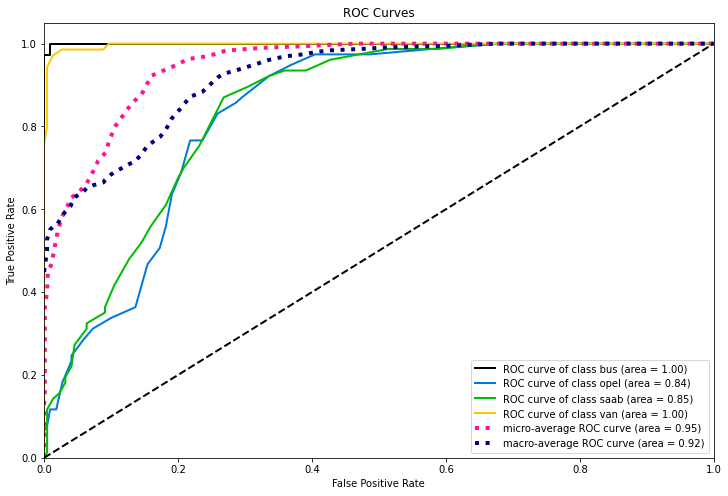

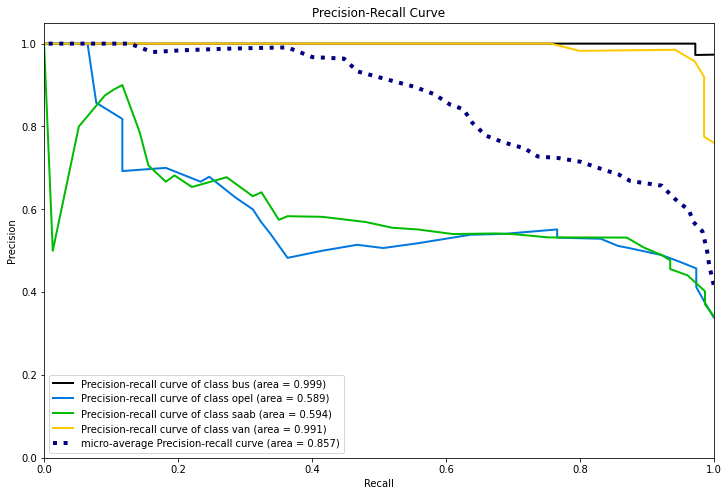

In [43]:
skplt.metrics.plot_roc(
  y_test,
  y_probas,
  figsize=(12, 8)
)
skplt.metrics.plot_precision_recall(
  y_test, 
  y_probas,
  figsize=(12, 8)
)
plt.show()

Random forest relearns less than decision tree, so ROC & Precision-Recall shows better results.